# Добрый день!

# Представляю проект "Обучение с учителем: качество модели" на примере Интернет-магазина «В один клик».



# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Задача:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подходы к решению задачи:**

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2.Нужно собрать данные по клиентам по следующим группам:

* Признаки, которые описывают коммуникацию сотрудников компании с клиентом.

* Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.

* Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.

* Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

**1.** Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

**2.** В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

**3.** Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

# Описание данных

**`market_file.csv`** Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

`id` — номер покупателя в корпоративной базе данных.

`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».

`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.

Согласие на это даёт покупатель.

`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.

`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.

`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.

`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.

`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**`market_money.csv`** Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

`Выручка` — сумма выручки за период.

**`market_time.csv`** Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксировано общее время.

`минут` — значение времени, проведённого на сайте, в минутах.

**`money.csv`** Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

`id` — номер покупателя в корпоративной базе данных.

`Прибыль` — значение прибыли.

## Загрузка данных

### Загрузка библиотек

In [ ]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder)

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score


In [ ]:
# загрузка Phi_K

!pip install phik -q
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
# загрузка SHAP

!pip install shap -q

### Загрузка файлов данных

In [ ]:
# чтение и загрузка файлов - основной датасет, данные о поведении покупателя на сайте
market = pd.read_csv('/datasets/market_file.csv', sep=',', decimal = '.')
display(market.head())
market.shape

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


(1300, 13)

Целевой признак - **Покупательская активность**

In [ ]:
# чтение и загрузка файлов - данные о выручке, которую получает магазин с покупателя
revenue = pd.read_csv('/datasets/market_money.csv', sep=',', decimal = '.')
display(revenue.head())
revenue.shape

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


(3900, 3)

In [ ]:
# чтение и загрузка файлов - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода
time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal = '.')
display(time.head())
time.shape

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


(2600, 3)

In [ ]:
# чтение и загрузка файлов - данные о среднемесячной прибыли покупателя за последние 3 месяца
profit3m = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
display(profit3m.head())
profit3m.shape

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


(1300, 2)

**Вывод:**
Данные загружены корректно, размерность всех таблиц проверена. Данные в таблицах соответвуют описанию.

## Предобработка данных

In [ ]:
# проверим формат данных
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [ ]:
# выведение количества пропущенных значений для каждого столбца
market.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [ ]:
# явные дубликаты
market.duplicated().sum()

0

In [ ]:
# проверка не неявные дубликаты
for column in market.columns:
    print("Значения в столбце '", column,"':", market[column].unique(), '\n')

Значения в столбце ' id ': [215348 215349 215350 ... 216645 216646 216647] 

Значения в столбце ' Покупательская активность ': ['Снизилась' 'Прежний уровень'] 

Значения в столбце ' Тип сервиса ': ['премиум' 'стандартт' 'стандарт'] 

Значения в столбце ' Разрешить сообщать ': ['да' 'нет'] 

Значения в столбце ' Маркет_актив_6_мес ': [3.4 4.4 4.9 3.2 5.1 3.3 4.7 4.2 3.9 4.6 4.3 3.8 2.7 4.8 2.9 3.  2.4 1.7
 3.6 4.  1.5 3.5 4.1 3.1 1.4 0.9 5.6 2.6 5.5 5.2 5.8 5.  5.4 5.7 5.3 3.7
 6.3 6.6 4.5 6.1 5.9] 

Значения в столбце ' Маркет_актив_тек_мес ': [5 4 3] 

Значения в столбце ' Длительность ': [ 121  819  539  896 1064  762  431  284  192  154  450  110  623  199
  438  923  708  167  209  581  829  607  572  365  566  811  268  558
  534  730  488  436  637  554  330  504 1020  721  495  135  663 1047
  152  754  525  169  966  645  706  689  882 1007  304  339  954  771
  699  669  511  974  666  857 1048  756  506  759  768  720  219  377
  472  806  449  523  503  515  813  249  186  3

Значения в столбце 'Тип сервиса' указано не корректно: ['премиум' 'стандартт' 'стандарт']


In [ ]:
# исправим значение заменой на корректное

market['Тип сервиса'] = market['Тип сервиса'].str.replace('стандартт','стандарт')
market['Тип сервиса'].sort_values().unique()

array(['премиум', 'стандарт'], dtype=object)

In [ ]:
# проверим формат данных
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [ ]:
# выведение количества пропущенных значений для каждого столбца
revenue.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [ ]:
# явные дубликаты
revenue.duplicated().sum()

0

In [ ]:
# проверка не неявные дубликаты
for column in revenue.columns:
    print("Значения в столбце '", column,"':", revenue[column].unique(), '\n')

Значения в столбце ' id ': [215348 215349 215350 ... 216645 216646 216647] 

Значения в столбце ' Период ': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'] 

Значения в столбце ' Выручка ': [   0.  3293.1 4472.  ... 5224.6 4720.  4448.3] 



Значения в столбце ' Период ' указано не понятно: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

In [ ]:
# исправим значение заменой на понятные обозначения по месяцам

revenue['Период'] = revenue['Период'].str.replace('препредыдущий_месяц','1мес')
revenue['Период'] = revenue['Период'].str.replace('предыдущий_месяц','2мес')
revenue['Период'] = revenue['Период'].str.replace('текущий_месяц','3мес')

revenue['Период'].sort_values().unique()

array(['1мес', '2мес', '3мес'], dtype=object)

In [ ]:
# проверим формат данных
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [ ]:
# выведение количества пропущенных значений для каждого столбца
time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [ ]:
# явные дубликаты
time.duplicated().sum()

0

In [ ]:
# проверка не неявные дубликаты
for column in time.columns:
    print("Значения в столбце '", column,"':", time[column].unique(), '\n')

Значения в столбце ' id ': [215348 215349 215350 ... 216645 216646 216647] 

Значения в столбце ' Период ': ['текущий_месяц' 'предыдцщий_месяц'] 

Значения в столбце ' минут ': [14 13 10 12  8 11  6  7  9  5 15  4 16 17 19 18 22 20 21 23] 



Значения в столбце ' Период ' указано не корректно: ['текущий_месяц' 'предыдцщий_месяц']

In [ ]:
# исправим значение заменой на корректное

time['Период'] = time['Период'].str.replace('предыдцщий_месяц','предыдущий_месяц')
time['Период'].sort_values().unique()

array(['предыдущий_месяц', 'текущий_месяц'], dtype=object)

In [ ]:
# проверим формат данных
profit3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [ ]:
# выведение количества пропущенных значений для каждого столбца
profit3m.isna().sum()

id         0
Прибыль    0
dtype: int64

In [ ]:
# явные дубликаты
profit3m.duplicated().sum()

0

In [ ]:
# проверка не неявные дубликаты
for column in profit3m.columns:
    print("Значения в столбце '", column,"':", profit3m[column].unique(), '\n')

Значения в столбце ' id ': [215348 215349 215350 ... 216645 216646 216647] 

Значения в столбце ' Прибыль ': [0.98 4.16 3.13 4.87 4.21 3.95 3.62 5.26 4.93 4.66 3.06 5.08 4.55 4.03
 3.49 1.83 2.67 3.65 2.95 3.03 6.27 3.86 2.82 1.4  1.63 3.69 4.08 4.18
 4.26 4.27 4.42 3.88 2.42 4.78 4.85 4.05 3.48 5.16 4.6  5.7  5.44 4.1
 2.93 3.9  3.28 5.09 3.19 4.77 5.01 6.73 7.43 4.28 3.73 3.38 3.47 5.
 2.02 3.68 2.68 4.46 2.41 5.4  3.4  4.22 4.5  4.98 3.96 3.18 4.65 3.92
 3.89 5.64 2.76 4.25 3.71 4.63 2.97 3.24 3.81 4.04 6.33 4.68 3.6  3.04
 4.41 3.98 2.47 4.52 4.01 5.31 2.53 5.83 4.48 2.98 4.92 3.08 4.9  3.94
 2.99 4.62 3.76 3.42 4.17 4.47 4.69 4.59 2.84 3.66 4.97 2.19 2.74 5.41
 4.12 3.93 5.02 3.52 3.39 6.12 4.64 3.14 4.71 4.99 3.74 4.   5.23 2.08
 6.55 2.36 4.32 3.15 2.77 5.56 3.44 3.58 2.92 4.67 3.33 2.94 1.06 2.45
 4.86 5.05 3.2  2.8  4.13 1.81 2.79 4.11 2.55 3.84 3.17 4.51 3.45 3.27
 4.2  4.33 3.01 5.79 3.12 6.59 6.88 2.7  2.69 5.49 2.34 5.25 3.25 4.74
 3.77 4.34 5.06 4.95 3.1  4.14 3.3  3.99 2

**Вывод:**
1) Пропуски в данных отсутствуют

2) Явные дубликаты в данных не обнаружены

3) Не явные дубликаты и ошибки в наименованиях исправлены

## Исследовательский анализ данных

### Статистический анализ всех признаков

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов
market.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


В датасете **market** у нас 8 количественных признаков. По максимальным значениям можно предположить, что есть выбросы, далее мы это проверим с помощью диаграммы размаха.

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов
revenue.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


В датасете **revenue** у нас 1 количественный признак. По максимальному значению можно предположить, что есть выбросы, далее мы это проверим с помощью диаграммы размаха.

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов
time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


В датасете **time** у нас 1 количественный признак. Далее построим гистограмму распределения, чтобы проверить частоту признака.

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов
profit3m.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


В датасете **profit3m** у нас 1 количественный признак. Далее построим гистограмму распределения, чтобы проверить частоту признака.

### Графики для признаков

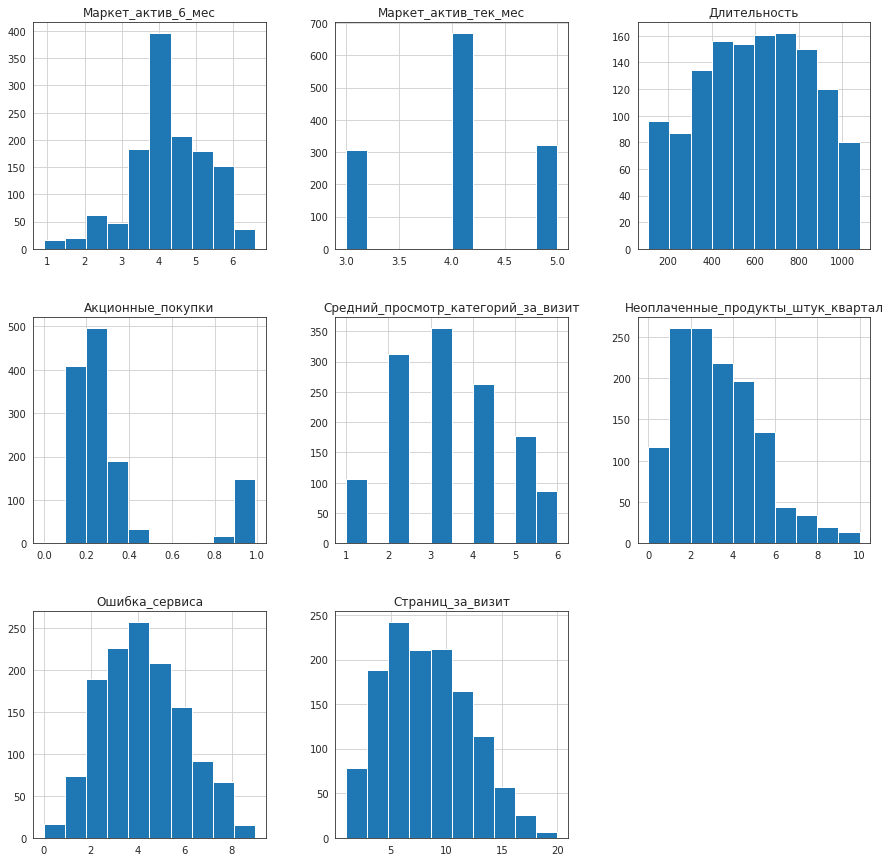

In [ ]:
# построим график для количественных признаков датасета *market*

col_market = market[['Маркет_актив_6_мес',
                     'Маркет_актив_тек_мес',
                     'Длительность',
                     'Акционные_покупки',
                     'Средний_просмотр_категорий_за_визит',
                     'Неоплаченные_продукты_штук_квартал',
                     'Ошибка_сервиса',
                     'Страниц_за_визит']]
col_market.hist(figsize=(15, 15), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

**Вывод:**

1) 'Маркет_актив_6_мес' - на гистограмме видим, что в основной массе в датасете присутствуют клиенты с активностью от 4 мес и выше. Доля клиентов с активностью менее 3 мес минимальна.

2) 'Маркет_актив_тек_мес' - на гистограмме видим, что данный признак имеет четкое значение 3,4 или 5 маркетинговых коммуникаций, у большинства клиентов - это по 4 коммуникации.

3) 'Длительность' - этот признак показывает сколько дней прошло с момента регистрации покупателя на сайте. На гистограмме видим, что в датасете присутствуют клиенты, которые зарегистрированы более 80 дней на сайте (то есть новых клиентов нет)

4) 'Акционные_покупки' - на гистограмме видим, что доля покупок по акции в основном составляет 10-30% от от общего числа покупок за последние 6 месяцев. И только малая часть клиентов покупает на 80%.

5) 'Средний_просмотр_категорий_за_визит' - на гистограмме видим, что на выбор представлено 6 категорий товаров и клиенты смотрят в большинстве случаев от 2 до 4 категорий в месяц.

6) 'Неоплаченные_продукты_штук_квартал' - от 1 до 5 товаров клиенты не оплачивают в своей корзине.

7) 'Ошибка_сервиса' - гистограмма похожа на нормальное распределение, и это говорит о том, что сбои на сайте происходят часто  и компании стоит обратить на этот показатель внимание (от 2 до 6 сбоев стабильно)

8) 'Страниц_за_визит' - большинство клиентов в среднем смотрят от 5 до 10 страниц на сайте.


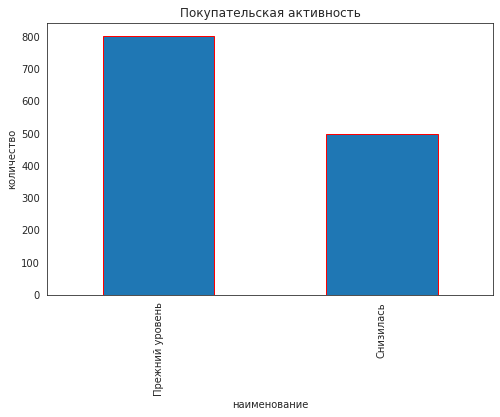

In [ ]:
# посмотрим как распределен целевой признак

market['Покупательская активность'].value_counts().plot(kind='bar', figsize=(8,5), ec='red')
plt.title('Покупательская активность')
plt.xlabel('наименование')
plt.ylabel('количество')
plt.show();

Вцелом можно сказать, что этот класс несбалансирован, то есть клиентов с активностью "Прежний уровень" в 1,5 раза больше , чем с активностью "Снизилась"

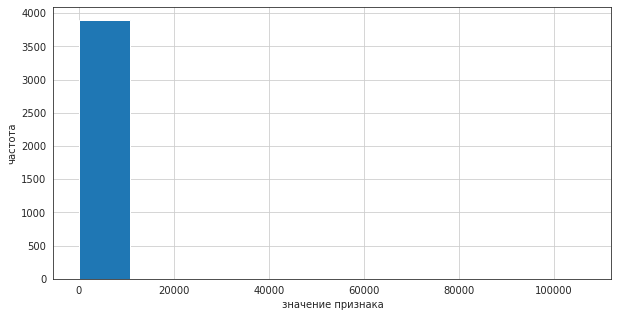

In [ ]:
# построим график для количественных признаков датасета *revenue*

col_revenue = revenue['Выручка']
col_revenue.hist(figsize=(10, 5), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

Гистограмма в данном случае не показательна, так как есть выбросы.

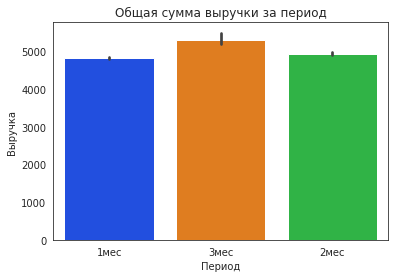

In [ ]:
# посмотрим на общее распределение выручки по периодам

sns.barplot(
    x='Период',
    y='Выручка',
    data=revenue,
    palette='bright')
plt.title('Общая сумма выручки за период')
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.show();

В текущем месяце Выручка немного увеличилась по сравнению с предыдущими месяцами.

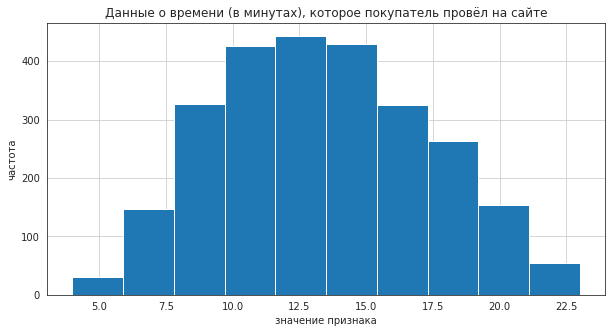

In [ ]:
# построим график для количественных признаков датасета *time*

col_time = time[['минут']]
col_time.hist(figsize=(10, 5), bins=10)
plt.title('Данные о времени (в минутах), которое покупатель провёл на сайте')
plt.xlabel('значение признака')
plt.ylabel('частота');

Гистограмма с нормальным распределением, и в среднем клиент проводит на сайте от 8 до 17 минут.

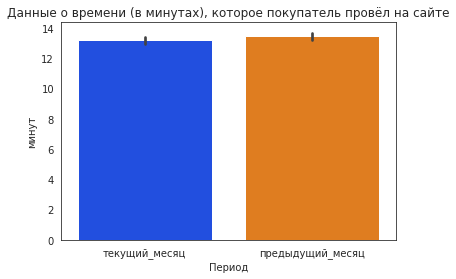

In [ ]:
# посмотрим на общее распределение времени на сайте по периодам

sns.barplot(
    x='Период',
    y='минут',
    data=time,
    palette='bright')
plt.title('Данные о времени (в минутах), которое покупатель провёл на сайте')
plt.xlabel('Период')
plt.ylabel('минут')
plt.show();

Если смотреть на график по периодам, то значения месяц к месяцу стабильны - 13 минут в среднем.

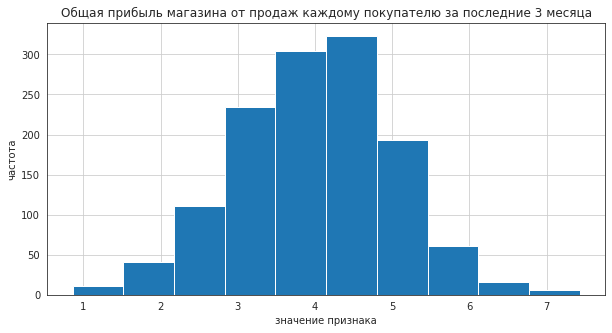

In [ ]:
# построим график для количественных признаков датасета *profit3m*

col_profit3m = profit3m[['Прибыль']]
col_profit3m.hist(figsize=(10, 5), bins=10)
plt.title('Общая прибыль магазина от продаж каждому покупателю за последние 3 месяца')
plt.xlabel('значение признака')
plt.ylabel('частота');

На гистограмме видим, что прибыль составляет в основном от 3 до 5 единиц за последние 3 месяца, распределение близкое к нормальному.

**Далее построим диаграммы размаха по количественным признакам**

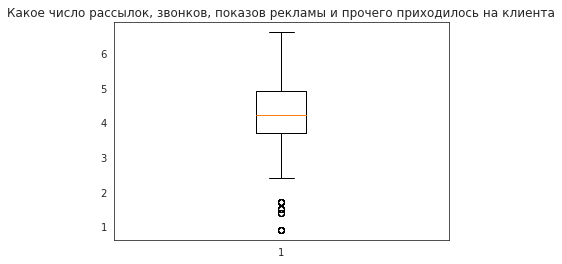

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Маркет_актив_6_мес'])

plt.title('Какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента')
plt.show();

Есть небольшое количество выбросов, и так как по значениям не сильно отклоняется от минимума, то удалять их не будем.

'Маркет_актив_тек_мес' - так как ранее на гистограмме мы определили, что в данных присутствует только 3 значения, то диаграмма размаха не подойдет для этого показателя.

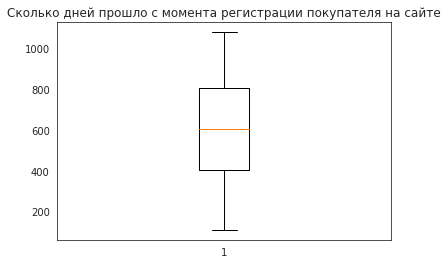

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Длительность'])

plt.title('Сколько дней прошло с момента регистрации покупателя на сайте')
plt.show();

Показатель достаточно стабильный, выбросы отсутствуют.

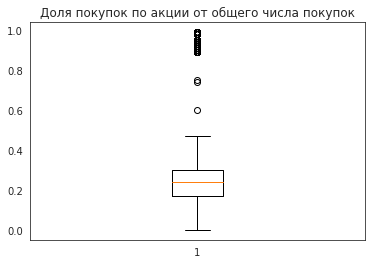

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Акционные_покупки'])

plt.title('Доля покупок по акции от общего числа покупок')
plt.show();

По этому показателю имеется достаочное количество выбросов, поэтому посмотрим на данные подробнее.

In [ ]:
# отберем значения: доля покупок по акции более 50%

market_50 = market.query('Акционные_покупки >= 0.5')
display(market_50.head())
market_50.shape

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
14,215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4
16,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3


(168, 13)

Строк с показателем "Акционные покупки" (среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев) получилось 168 - это 12% от всей выборки. Получается 12% это высокая доля, поэтому эти выбросы удалять не будем, так как они могут содержать в себе важгую информацию для нашего целевого признака - Покупательская активность.

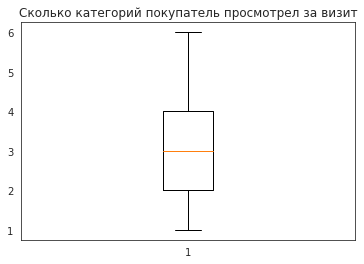

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Средний_просмотр_категорий_за_визит'])

plt.title('Сколько категорий покупатель просмотрел за визит')
plt.show();

Показатель достаточно стабильный, выбросы отсутствуют.

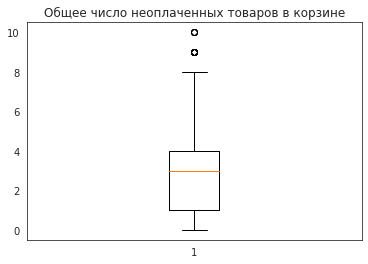

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Неоплаченные_продукты_штук_квартал'])

plt.title('Общее число неоплаченных товаров в корзине')
plt.show();

Есть небольшое количество выбросов, и так как по значениям не сильно отклоняется от максимума , то удалять их не будем.

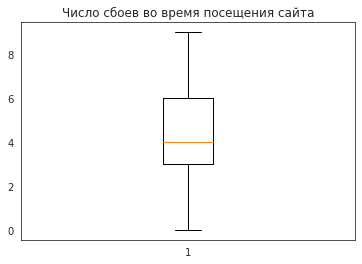

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Ошибка_сервиса'])

plt.title('Число сбоев во время посещения сайта')
plt.show();

Показатель достаточно стабильный, выбросы отсутствуют.

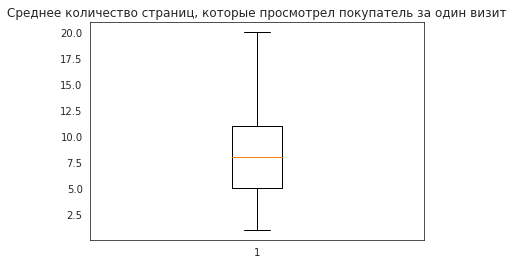

In [ ]:
# диаграмма по признакам датасета market

plt.boxplot(market['Страниц_за_визит'])

plt.title('Среднее количество страниц, которые просмотрел покупатель за один визит')
plt.show();

Показатель достаточно стабильный, выбросы отсутствуют.

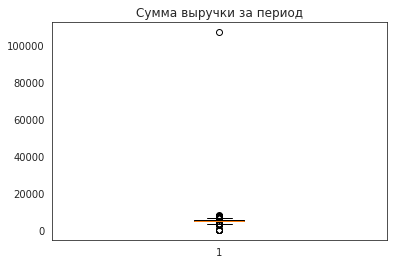

In [ ]:
# диаграмма по признакам датасета revenue

plt.boxplot(revenue['Выручка'])

plt.title('Сумма выручки за период')
plt.show();

Явный выброс , который лучше удалить из датасета **revenue**

In [ ]:
revenue.shape

(3900, 3)

In [ ]:
# перезапишем датасет, удалив выброс

# revenue = revenue.query('Выручка <= 20000')
# revenue.shape

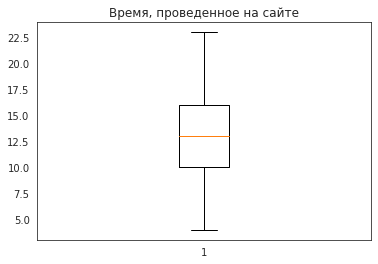

In [ ]:
# диаграмма по признакам датасета time

plt.boxplot(time['минут'])

plt.title('Время, проведенное на сайте')
plt.show();

Показатель достаточно стабильный, выбросы отсутствуют.

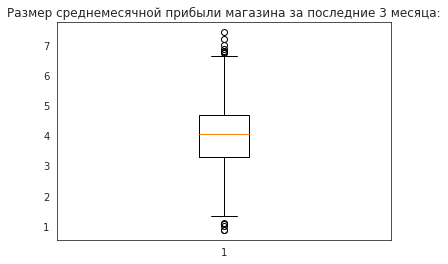

In [ ]:
# диаграмма по признакам датасета profit3m

plt.boxplot(profit3m['Прибыль'])

plt.title('Размер среднемесячной прибыли магазина за последние 3 месяца:')
plt.show();

По этому показателю имеется достаочное количество выбросов, и так как они не сильно отклоняются от максимальных и минимальных значений, то эти данные оставим.

### Клиенты с покупательской активностью не менее трёх месяцев

In [ ]:
# для отбора таких клиентов нам понадобится датасет с данными о выручке revenue, так как в нем
# отражается информация какую выручку получает магазин от продаж каждому покупателю за период
# то есть это и есть те клиенты, которые были активны, посмотрим на данные еще раз
display(revenue.head())

,id,Период,Выручка
0,215348,1мес,0.0
1,215348,3мес,3293.1
2,215348,2мес,0.0
3,215349,1мес,4472.0
4,215349,3мес,4971.6


In [ ]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


На предыдущем шаге по статистическому анализу определили минимальное значение = 0, то есть присутствуют "нулевые" клиенты, которых потом надо будет исключить. Поэтому добавим данные из "revenue" в датасет "market", соеденив эти таблицы по полю 'id'

Так как данные о выручке находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода

In [ ]:
# сформируем сводную таблицу

revenue = pd.pivot_table(revenue,
                            index = 'id',
                            columns = 'Период',
                            values = 'Выручка',
                            aggfunc = ['sum'])

revenue = revenue.rename(columns={'sum':''})
display(revenue)

Период    1мес    2мес    3мес
id                            
215348     0.0     0.0  3293.1
215349  4472.0  5216.0  4971.6
215350  4826.0  5457.5  5058.4
215351  4793.0  6158.0  6610.4
215352  4594.0  5807.5  5872.5
...        ...     ...     ...
216643  4704.0  3664.0  4741.7
216644  5299.0  4729.0  5353.0
216645  5334.0  5160.0  5139.2
216646  4725.0  4923.0  5224.6
216647  5183.0  4720.0  4448.3

[1300 rows x 3 columns]

In [ ]:
revenue.columns = ['Выручка'.join(col) for col in revenue.columns]
display(revenue)

,Выручка1мес,Выручка2мес,Выручка3мес
id,,,
215348,0.0,0.0,3293.1
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
...,...,...,...
216643,4704.0,3664.0,4741.7
216644,5299.0,4729.0,5353.0
216645,5334.0,5160.0,5139.2


In [ ]:
market3m=market
market3m.shape

(1300, 13)

In [ ]:
market3m = market.merge(revenue, how = 'left', on='id')

display(market3m.head(10))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,4503.0,5685.0,5869.6
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3263.0,3772.6
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4146.5,4566.4
9,215357,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,5986.3


In [ ]:
market3m.shape

(1300, 16)

In [ ]:
market3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [ ]:
# проверим сколько клиентов с нулевой выручкой, то есть они не попали
# в статус "активных" за последние 3 мес

market3m_0 = market3m.query('Выручка1мес == 0' or 'Выручка2мес == 0' or 'Выручка3мес == 0')
market3m_0.shape


(3, 16)

Таких получилось 3 строки

In [ ]:
display(market3m_0)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,0.0,0.0,3293.1
9,215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,5986.3
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2,0.0,0.0,4735.0


In [ ]:
# исключаем неактивных клиентов

market3m = market3m.query('Выручка1мес != 0' or 'Выручка2мес != 0' or 'Выручка3мес != 0')
market3m.shape

(1297, 16)

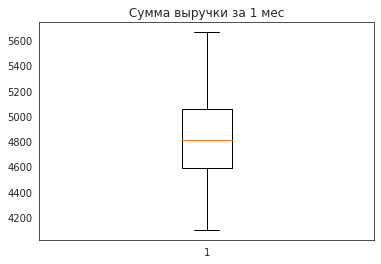

In [ ]:
# диаграмма для удаления ранее найденного выброса по выручке

plt.boxplot(market3m['Выручка1мес'])

plt.title('Сумма выручки за 1 мес')
plt.show();

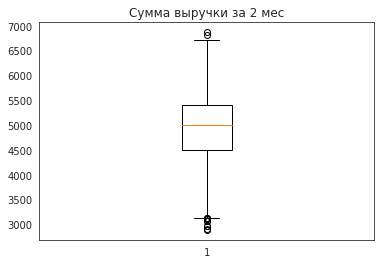

In [ ]:
# диаграмма для удаления ранее найденного выброса по выручке

plt.boxplot(market3m['Выручка2мес'])

plt.title('Сумма выручки за 2 мес')
plt.show();

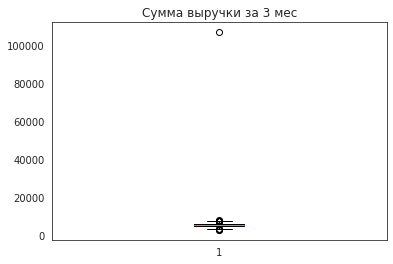

In [ ]:
# диаграмма для удаления ранее найденного выброса по выручке

plt.boxplot(market3m['Выручка3мес'])

plt.title('Сумма выручки за 3 мес')
plt.show();

In [ ]:
# перезапишем датасет, удалив выброс

market3m = market3m.query('Выручка3мес <= 20000')
market3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

**Вывод:**

- Проведен статистический анализ всех количественных признаков

- Были построены гистограммы распределения значений по количественным признакам и сформулированы краткие выводы по каждому графику.

- Также были построены диаграммы размаха для определения "выбросов" в данных. Часть выбросов были удалены. А в тех случаях, когда выбросы не сильно отклонялись от минимальных и максимальных значений, то их оставили.

- Были отобраны клиенты с покупательной активностью за последние месяцы, по которым Выручка была не равна 0.

- Соединив 2 таблицы, получается, что это и есть все клиенты с покупательской активностью не менее трёх месяцев.

## Объединение таблиц

На этом шаге необходимо объединить таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании нам не понадобятся.

Таблицы market (market_file) и revenue (market_money) у нас были объединены на предыдущем шаге
в  п 3.3 - итоговая таблица "market3m", теперь к ней необходимо добавить таблицу time (market_time), далее подготовим ее в нужном формате.

### Отдельный столбец для каждого периода.

Так как данные о времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода

In [ ]:
# сформируем сводную таблицу

time = pd.pivot_table(time,
                            index = 'id',
                            columns = 'Период',
                            values = 'минут',
                            aggfunc = ['sum']).round(decimals=2)
time = time.rename(columns={'sum':''})
display(time)

Период предыдущий_месяц текущий_месяц
id                                   
215348               13            14
215349               12            10
215350                8            13
215351               11            13
215352                8            11
...                 ...           ...
216643               14             7
216644               12            11
216645               12            18
216646               18             7
216647               15            10

[1300 rows x 2 columns]

In [ ]:
# переименуем колонки

time.columns = ['Время_'.join(col) for col in time.columns]
display(time)

,Время_предыдущий_месяц,Время_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


### Объединение таблиц

In [ ]:
# объединяем таблицы market3m и time

market3m = market3m.merge(time, how = 'left', on='id')
display(market3m.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время_предыдущий_месяц,Время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [ ]:
market3m.shape

(1296, 18)

Сделаем столбец с выручкой, как среднее значение между текущим и предыдущим месяцем, выраженный одним столбцом.

А также сделаем столбец с временем, как среднее значение между текущим и предыдущим месяцем, выраженный одним столбцом.

In [ ]:
# market3m['Выручка'] = market3m[['Выручка_1_мес', 'Выручка_2_мес', 'Выручка_3_мес']].mean(axis = 1)
market3m['Время'] = market3m[['Время_предыдущий_месяц', 'Время_текущий_месяц']].mean(axis = 1)
display(market3m.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время_предыдущий_месяц,Время_текущий_месяц,Время
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,11.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,10.5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,12.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,9.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,10.0


In [ ]:
market3m = market3m.drop(columns= ['Время_предыдущий_месяц',
                                   'Время_текущий_месяц'],axis=1)
display(market3m.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,11.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,10.5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,12.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,9.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10.0


In [ ]:
market3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

**Вывод:**

- В таблице time данные были разеделены на 2 колонки

- В итоговую таблицу market3m были добавлены столбцы по Выручке и по Времени, проведенном на сайте в минутах с разделением обоих этих показателей на периоды.

## Корреляционный анализ

Для проведения корреляционного анализа используем библиотеку phik для подсчёта корреляции между признаками разных типов данных

In [ ]:
market3m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [ ]:
# удалим столбец id клиентов для корректного построения матрицы корреляции

market3m_corr = market3m.drop(columns='id', axis= 1)
display(market3m_corr.head())

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,11.0
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,10.5
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,12.0
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,9.5
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10.0


In [ ]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['Маркет_актив_6_мес',
                 'Маркет_актив_тек_мес',
                 'Длительность',
                 'Акционные_покупки',
                'Средний_просмотр_категорий_за_визит',
                'Неоплаченные_продукты_штук_квартал',
                 'Ошибка_сервиса',
                 'Страниц_за_визит',
                 'Выручка1мес',
                 'Выручка2мес',
                 'Выручка3мес',
                 'Время']


In [ ]:
# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = market3m_corr.phik_matrix(interval_cols=interval_cols)

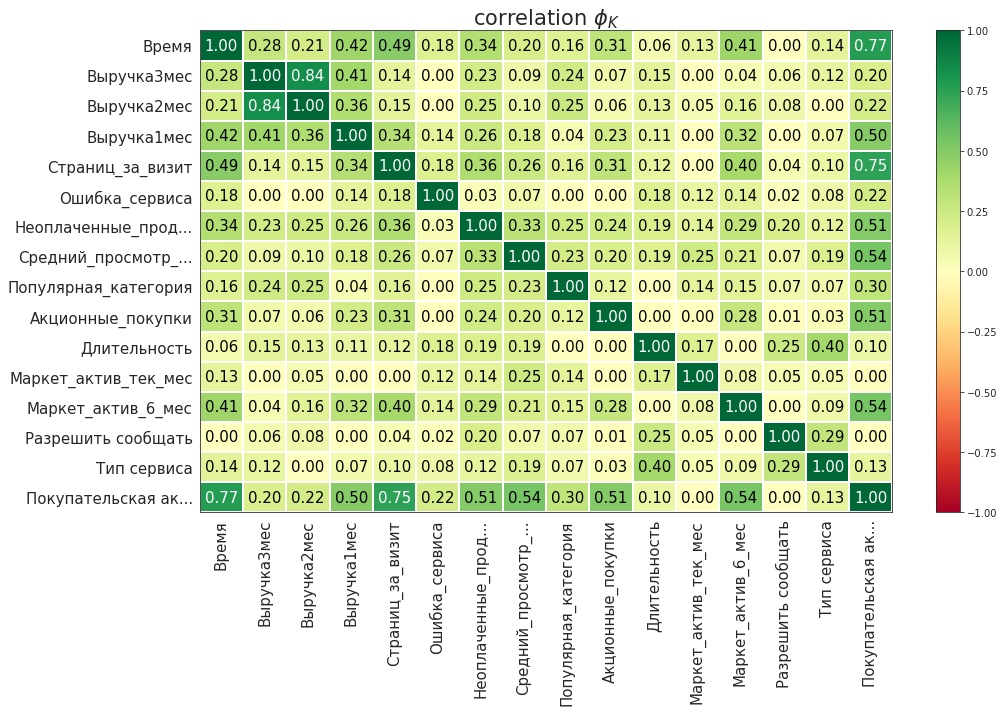

In [ ]:
# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 10)
)

**Вывод:**

* Мультиколлинеарность отстуствует, так как нет таких признаков, у которых бы была явная корреляция с коэффицентом = 1

* Высокая корреляция > 0,7 у признаков: Покупательская_активность - Время (проведённого на сайте, в минутах), Покупательская_активность - Страниц_за_визит

* Средняя корреляция 0,5 - 0,6 у признаков: Покупательская_активность - Неоплаченные_продукты_штук_квартал, Покупательская_активность - Средний_просмотр_категорий_за_визит, Покупательская_активность - Акционные_покупки и Покупательская активность - Маркет_актив_6_мес

* Корреляция с коэффициентом 0,4-0,5 у признаков: Время - Страниц за визит, Длительность - Тип сервиса, Время - Маркет актив 6 мес.

## Использование пайплайнов

Сначала обозначим, какие данные требуют масштабирования, а какие — кодирования. Признаки  будем кодировать разными методами

### Подготовка данных для моделей, создание пайплайна

In [ ]:
# зададим константы

RANDOM_STATE = 55
TEST_SIZE = 0.3

In [ ]:
# с помощью функции приведем показатель "Покупательская активность" к бинарному значению

def binar_activity(buyer):
    try:
        if buyer == "Прежний уровень":
            return 1
        elif buyer == "Снизилась":
            return 0
    except:
        pass

In [ ]:
# добавим новый столбец в наш датасет

market3m['buyer_activity'] = market3m['Покупательская активность'].apply(binar_activity)
display(market3m.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время,buyer_activity
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,11.0,0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,10.5,0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,12.0,0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,9.5,0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10.0,0


In [ ]:
# определим целевой показатель

X = market3m.drop(columns=['Покупательская активность', 'id', 'buyer_activity'], axis=1)
y = market3m['buyer_activity']

In [ ]:
# разделение датасета на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE,
                                                    test_size = TEST_SIZE, stratify = y)

In [ ]:
X_train.shape

(907, 15)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 1000 to 422
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип сервиса                          907 non-null    object 
 1   Разрешить сообщать                   907 non-null    object 
 2   Маркет_актив_6_мес                   907 non-null    float64
 3   Маркет_актив_тек_мес                 907 non-null    int64  
 4   Длительность                         907 non-null    int64  
 5   Акционные_покупки                    907 non-null    float64
 6   Популярная_категория                 907 non-null    object 
 7   Средний_просмотр_категорий_за_визит  907 non-null    int64  
 8   Неоплаченные_продукты_штук_квартал   907 non-null    int64  
 9   Ошибка_сервиса                       907 non-null    int64  
 10  Страниц_за_визит                     907 non-null    int64  
 11  Выручка1мес                  

In [ ]:
X_test.shape

(389, 15)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 253 to 513
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип сервиса                          389 non-null    object 
 1   Разрешить сообщать                   389 non-null    object 
 2   Маркет_актив_6_мес                   389 non-null    float64
 3   Маркет_актив_тек_мес                 389 non-null    int64  
 4   Длительность                         389 non-null    int64  
 5   Акционные_покупки                    389 non-null    float64
 6   Популярная_категория                 389 non-null    object 
 7   Средний_просмотр_категорий_за_визит  389 non-null    int64  
 8   Неоплаченные_продукты_штук_квартал   389 non-null    int64  
 9   Ошибка_сервиса                       389 non-null    int64  
 10  Страниц_за_визит                     389 non-null    int64  
 11  Выручка1мес                   

In [ ]:
# сформируем списки для кодирования признаков

# категориальные
ohe_columns = ['Тип сервиса',
               'Разрешить сообщать']

# ранговые
ord_columns = ['Популярная_категория']

# количественные
num_columns = ['Маркет_актив_6_мес',
               'Маркет_актив_тек_мес',
               'Длительность',
               'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал',
               'Ошибка_сервиса',
               'Страниц_за_визит',
               'Выручка1мес',
               'Выручка2мес',
               'Выручка3мес',
               'Время']

In [ ]:
# создаём пайплайн для подготовки признаков из списка ohe_columns
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))])

In [ ]:
# создаём пайплайн для подготовки признаков из списка ord_columns
# SimpleImputer + ORD + SimpleImputer

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[
                    ['Товары для детей',
                     'Домашний текстиль',
                     'Косметика и аксесуары',
                     'Техника для красоты и здоровья',
                     'Кухонная посуда',
                     'Мелкая бытовая техника и электроника']],
                handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])


In [ ]:
# подготовка общего пайплайна для подготовки данных
# preprocessor__num = preprocessor_ + _num:
# preprocessor__num — пайплайн, в котором находится шаг масштабирования
# num — шаг масштабирования с методом и списком столбцов
# заодно укажем 'passthrough' — вариант без масштабирования

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Обучение четырех моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

В каждом словаре указываем название модели, её гиперпараметры, метод масштабирования — всё, что хотим перебрать в качестве гиперпараметров модели.

Что есть в словаре:

model – название модели;

model__n_neighbors — задаём гиперпараметр _n_neighbors для модели model_ из pipe_final;

preprocessor__num – обращаемся к шагу preprocessor в пайплайне pipe_final,

а затем к шагу num в пайплайне data_preprocessor.

In [ ]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,6),
        'models__max_features': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='saga',
            penalty='l1'
        )],
        'models__C': range(1,4) ,
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели опорных векторов SVC()
    {
        'models': [SVC(kernel = 'linear', probability=True, random_state=RANDOM_STATE)],
       'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }
]

Для автоматического подбора гиперпараметров будем использовать инструмент RandomizedSearchCV.

models — инициализированная модель

param_grid — словарь с гиперпараметрами модели

cv — тип кросс-валидации

scoring — метрика, которую используем для выбора лучшего решения

n_jobs=-1 — подключаем к расчёту ядра процессора

In [ ]:
# чтобы найти лучшее решение, перебирать будем и гиперпараметры, и методы подготовки данных.
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

При подборе лучшей модели мы используем метрику ROC-AUC_SCORE, так как целевой признак "Покупательская активность" в нашем проекте бинарный.

Метрика ROC-AUC устойчива к несбалансированным классам, что является важным свойством в реальных задачах. Она не зависит от порога классификации и позволяет оценить качество модели независимо от выбранного порога

In [ ]:
# убираем ошибки из-за возможно устаревшей версии sklearn

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# обучаем на тренировочных данных

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['Тип '
                                         

### Выбор лучшей модели, используя заданную метрику

In [ ]:
# получим все результаты и сделаем из них датафрейм

result = pd.DataFrame(randomized_search.cv_results_)

In [ ]:
# посмотрим результат работы всех моделей

display(result[['rank_test_score', 'param_models', 'mean_test_score','params']].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
4,1,"SVC(kernel='linear', probability=True, random_...",0.899054,"{'preprocessor__num': MinMaxScaler(), 'models'..."
8,2,KNeighborsClassifier(),0.877884,"{'preprocessor__num': StandardScaler(), 'model..."
3,3,KNeighborsClassifier(),0.849505,"{'preprocessor__num': StandardScaler(), 'model..."
9,4,DecisionTreeClassifier(random_state=55),0.833131,"{'preprocessor__num': StandardScaler(), 'model..."
2,5,DecisionTreeClassifier(random_state=55),0.814559,"{'preprocessor__num': MinMaxScaler(), 'models_..."
0,6,DecisionTreeClassifier(random_state=55),0.796276,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,7,DecisionTreeClassifier(random_state=55),0.792844,"{'preprocessor__num': MinMaxScaler(), 'models_..."
5,8,DecisionTreeClassifier(random_state=55),0.757345,"{'preprocessor__num': MinMaxScaler(), 'models_..."
6,9,DecisionTreeClassifier(random_state=55),0.706918,"{'preprocessor__num': StandardScaler(), 'model..."
7,9,DecisionTreeClassifier(random_state=55),0.706918,"{'preprocessor__num': MinMaxScaler(), 'models_..."


In [ ]:
# выведем лучшие параметры

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                            

In [ ]:
result[['param_models','param_models__n_neighbors']]

,param_models,param_models__n_neighbors
0,DecisionTreeClassifier(random_state=55),NaN
1,DecisionTreeClassifier(random_state=55),NaN
2,DecisionTreeClassifier(random_state=55),NaN
3,KNeighborsClassifier(),2
4,"SVC(kernel='linear', probability=True, random_...",NaN
5,DecisionTreeClassifier(random_state=55),NaN
6,DecisionTreeClassifier(random_state=55),NaN
7,DecisionTreeClassifier(random_state=55),NaN
8,KNeighborsClassifier(),4
9,DecisionTreeClassifier(random_state=55),NaN


In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.8623135583716498


In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))


Площадь ROC-кривой: 0.9108444544129191


**Вывод:**

- Были подготовлены данные для обучения моделей: целевой признак "Покупательская активность" приведен к бинарному формату, удалены лишние столбцы

- Были сформированы:

1) паплайны для кодирования и масштабирования категориальных и количественных признаков с помощью кодировщиков OneHotEncoder и OrdinalEncoder, и скейлеров MinMaxScaler и StandardScaler

2) пайплайны с моделями и с их гиперпараметрами

- Была отражена таблица с результатами работы моделей и их лучшими параметрами. Данные были осортированы по убыванию лучшего значения метрики

- **По итогам отработки пайплайна лучшей моделью оказалсь SVC(kernel='linear', random_state=55) и Метрика ROC-AUC лучшей модели на кросс-валидации: 0.8990**

- На тестовой выборке Метрика **Площадь ROC-кривой на тестовой выборке: 0.9108**

- Мы использовали один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул нам лучшую модель

## Анализ важности признаков

### Оценка важности признаков для лучшей модели и график важности с помощью метода SHAP

Так как лучшей моделью оказалась SVC(kernel='linear', random_state=55), то проверку коэффициентов и оценку важности признаков будем проводить на ней

In [ ]:
# так как данные были ранее разделены на тренировочную и тестовую выборку, то
# на этом этапе закодируем признаки, как подобрал ранее "randomized_search"

# закодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = encoder.transform(X_test[ohe_columns])
encoder_col_names = encoder.get_feature_names()

In [ ]:
# закодируем категориальные признаки

ordinal = OrdinalEncoder(categories=[
                    ['Товары для детей',
                     'Домашний текстиль',
                     'Косметика и аксесуары',
                     'Техника для красоты и здоровья',
                     'Кухонная посуда',
                     'Мелкая бытовая техника и электроника']],
                handle_unknown='use_encoded_value', unknown_value=np.nan)

X_train_ord = ordinal.fit_transform(X_train[ord_columns])
X_test_ord = ordinal.transform(X_test[ord_columns])
# ordinal_col_names = encoder.get_feature_names()

In [ ]:
# масштабируем количественные признаки

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])


In [ ]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов указаны из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_ord = pd.DataFrame(X_train_ord, columns = ord_columns)
X_test_ord = pd.DataFrame(X_test_ord, columns = ord_columns)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_ord, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_ord, X_test_scaled], axis=1)

In [ ]:
# инициализируем модель
model_best  = SVC(kernel='linear', random_state=55, probability=True)

# обучаем модель на подготовленных данных

model_best.fit(X_train,y_train)

# получаем предсказания модели на тестовых данных и сохраняем результат в переменную predictions
predictions = model_best.predict(X_test)
display(predictions)


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

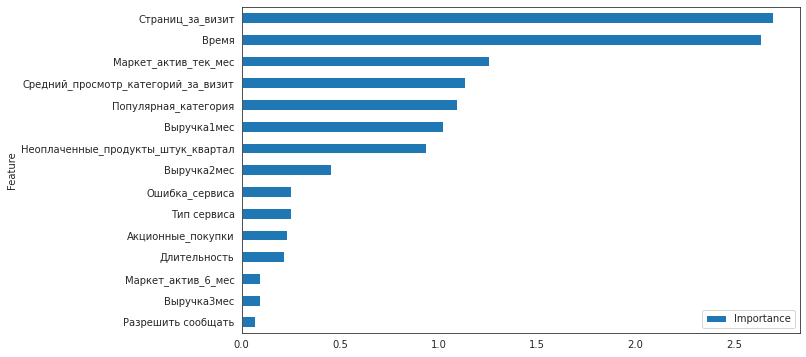

In [ ]:
# строим график важности признаков по величине коэффициентов
coefficients = model_best.coef_[0]
sns.set_style('white')
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

Самые значимые признаки: "Время" и "Страниц за визит"

Менее значиные признаки: "Популярная категория", "Маркет актив тек мес", "Гноплаченные продукты штук квартал" и "Средний просмотр категорий за визит"

Совсем мало значиные признаки: "Тип сервиса", "Акционные покупки", "Ошибка сервиса", "Выручка", "Доительность", "Разрешить сообщать", "Маркет актив 6 мес"

### Метод SHAP

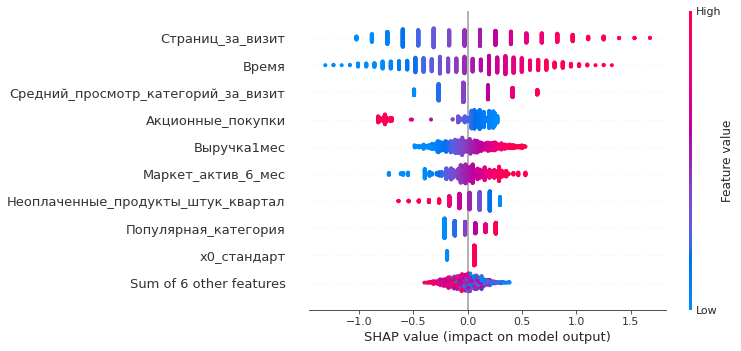

In [ ]:
# Диаграмма shap.plots.beeswarm — это один из вариантов визуализации вклада признаков
# в каждое предсказание модели.

import shap
explainer = shap.LinearExplainer(model_best, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

# На оси X отложены значения Шепли, на оси Y — признаки модели,
# расположенные сверху вниз в порядке убывания средних SHAP‑значений.

На графике значения Шепли показывают нам, что наиболее значимые признаки "Время" и "Страниц за визит" - чем больше эти значения, тем выше вероятность принадлежности к классу 1 (то есть Покупательская активность будет иметь значение "прежний уровень").

При этом у признака "Акционные покупки" тоже существенная значимость, но если у клиента чем ниже доля акционных покупок, тем выше принадлежность к классу 0 (то есть Покупательская активность будет иметь значение "снизилась")

Признак "Маркет актив 6 мес" на графике показывает большую сосредоточенность наблюдений вдоль оси и чем выше эти значения, тем больше вероятность принадлежности к классу 1.

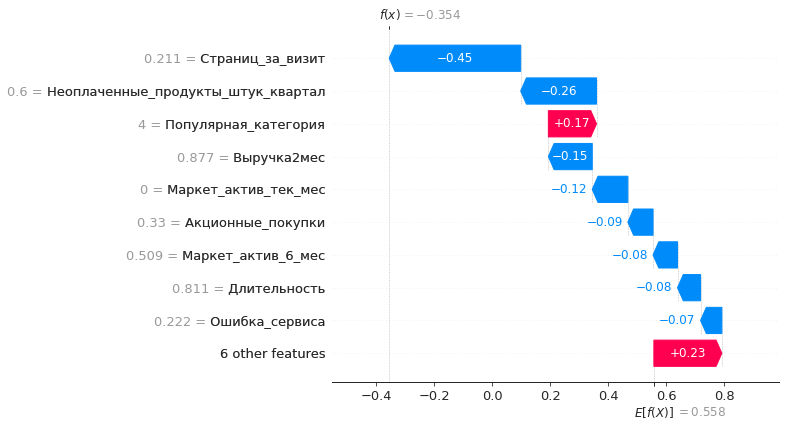

In [ ]:
# Диаграмма shap.plots.waterfall визуализирует индивидуальные SHAP-значения каждого наблюдения
# в датасете

shap.plots.waterfall(shap_values[5])

Сильнее всего на его классификацию влияет признак "Страниц_за_визит": он «перетягивает» предсказание в сторону класса 0. Значение f(x) на графике показывает, к какому классу признак склоняет наблюдение: отрицательные значения говорят о том, что наблюдение скорее относится к классу 0, а положительные — к классу 1.

То есть применительно к значимым признакам "Страниц_за_визит", "Неоплаченные продукты штук квартал", "Выручка 2 мес" : чем ниже эти показатели, тем больше вероятность получить значение целевого признака "Покупательская активность" = "снизилась" (0)

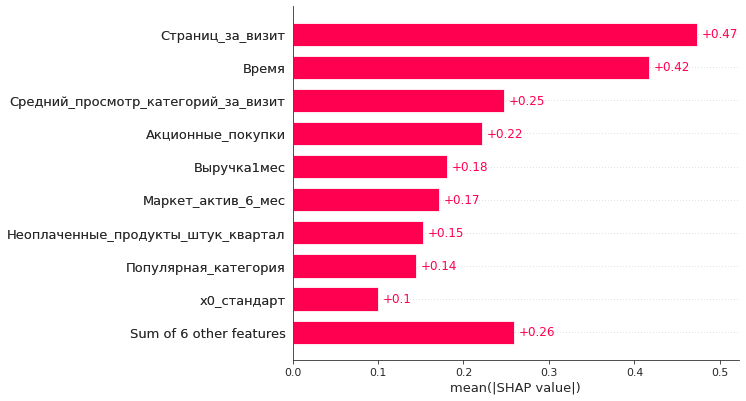

In [ ]:
# Столбчатая диаграмма shap.plots.bar отражает общий вклад признаков в прогнозы модели.
# Она показывает средние SHAP-значения признака по всем наблюдениям.

shap.plots.bar(shap_values)

Выше упомянутые по важности признаки также подтвердились и на этой диаграмме: "Время", "Страниц за визит", "Акционные покупки", "Средний просмотр категорий за визит"

### Выводы о значимости признаков

* Благодаря вычислениям значений Шепли удалось более точно оценить вклад признаков в модели.

* Этими значимыми признаками являются: "Время", "Страниц за визит", "Акционные покупки"

## Сегментация покупателей

### Сегментация покупателей по результатам моделирования и данных о прибыльности покупателей

По результатам моделирования мы поняли, что:

1) в датасете присутствует высокая корреляция между целевым признаком "Покупательская активность"  и "Время", "Покупательская активность" и "Страниц_за_визит", а также "Покупательская активность" и "Акционные_покупки"

2) по диаграммам значимости признаков эти данные еще раз подтвердились

Эта информация нам пригодится для определения рекомендаций по увеличению "Покупательской активности"

**Для проведения сегментации клиентов и оценки вероятности снижения покупательской активности на основе моделирования, используем наш тестовый датасет и добавим туда предсказания модели.**

In [ ]:
# так как отдельного файла для тестирования модели нет,
# то для сегментации клиентов берем наш тестовый датасет

display(X_test.head())

,x0_стандарт,x1_нет,Популярная_категория,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время
0,0.0,0.0,4.0,0.526316,0.5,0.538622,0.147727,0.4,0.5,0.222222,0.263158,0.264952,0.433095,0.441443,0.428571
1,1.0,0.0,2.0,0.666667,1.0,0.403967,0.136364,0.6,0.3,0.555556,0.263158,0.519614,0.540143,0.521293,0.514286
2,1.0,0.0,1.0,0.385965,0.5,0.470772,0.204545,0.0,0.8,0.888889,0.210526,0.263666,0.751476,0.816057,0.457143
3,1.0,0.0,1.0,0.649123,0.5,0.608559,0.000000,0.6,0.4,0.555556,0.473684,0.740193,0.676467,0.668902,0.714286
4,1.0,1.0,0.0,0.456140,0.0,0.751566,0.954545,0.6,0.0,0.555556,0.421053,0.612862,0.596934,0.582408,0.428571


In [ ]:
probas = model_best.predict_proba(X_test)[:,1]

In [ ]:
# добавим в него предсказания модели и вероятность отнесения к классу

X_test['Покупательская_активность'] = predictions
X_test['Вероятность'] = probas
display(X_test.head())

,x0_стандарт,x1_нет,Популярная_категория,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время,Покупательская_активность,Вероятность
0,0.0,0.0,4.0,0.526316,0.5,0.538622,0.147727,0.4,0.5,0.222222,0.263158,0.264952,0.433095,0.441443,0.428571,0,0.286843
1,1.0,0.0,2.0,0.666667,1.0,0.403967,0.136364,0.6,0.3,0.555556,0.263158,0.519614,0.540143,0.521293,0.514286,1,0.776090
2,1.0,0.0,1.0,0.385965,0.5,0.470772,0.204545,0.0,0.8,0.888889,0.210526,0.263666,0.751476,0.816057,0.457143,0,0.074430
3,1.0,0.0,1.0,0.649123,0.5,0.608559,0.000000,0.6,0.4,0.555556,0.473684,0.740193,0.676467,0.668902,0.714286,1,0.950238
4,1.0,1.0,0.0,0.456140,0.0,0.751566,0.954545,0.6,0.0,0.555556,0.421053,0.612862,0.596934,0.582408,0.428571,0,0.399055


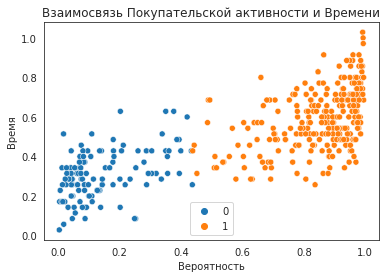

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Времени"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Время', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Времени")
plt.show();

Получается, что вероятность отнесения признака "Покупательская активность" к классу = 50%, а признак "Время" при значениях ниже 0,4 гарантированно получает класс "снизилась". Взаимосвязь линейная

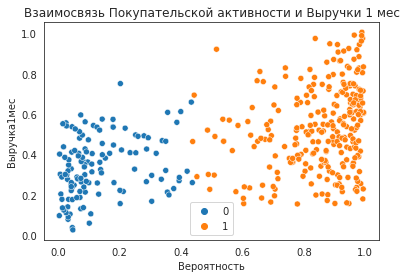

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Выручки"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Выручка1мес', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Выручки 1 мес")
plt.show();

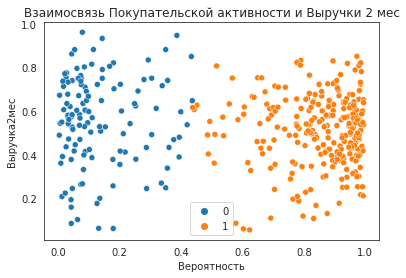

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Выручки"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Выручка2мес', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Выручки 2 мес")
plt.show();

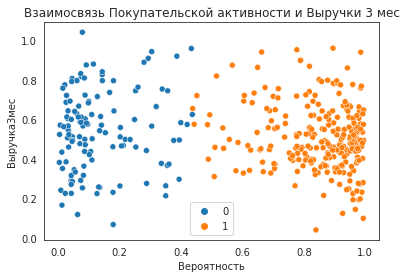

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Выручки"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Выручка3мес', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Выручки 3 мес")
plt.show();

Взаимосвязь этих показателей нелинейная

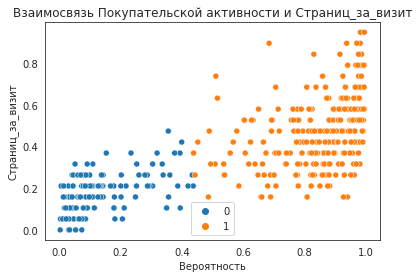

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Страниц_за_визит"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Страниц_за_визит', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Страниц_за_визит")
plt.show();

Получается, что вероятность отнесения признака "Покупательская активность" к классу = 50%, а признак "Страниц_за_визит" при значениях ниже 0,3 гарантированно получает класс "снизилась". Взаимосвязь линейная

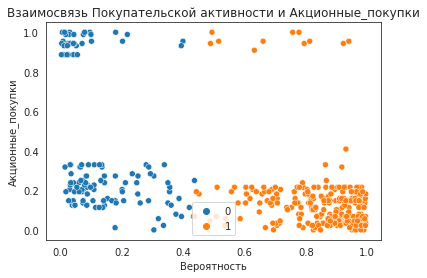

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Покупательской активности и Акционные_покупки"

sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Акционные_покупки', hue='Покупательская_активность')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Покупательской активности и Акционные_покупки")
plt.show();

Взаимосвязь этих показателей нелинейная. Однако есть часть клиентов, у которых была высокая доля покупок товаров по акции и при этом у них наблюдалось снижение активности. Возможно, такие клиенты случайно попадали на сайт исключительно для того, чтобы приобрести товары по акции

### Выбор группы покупателей и предложения по увеличению покупательской активности

**Выберем эту группу покупателей для дальнейшего исследования и рекомендаций**

"Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности"

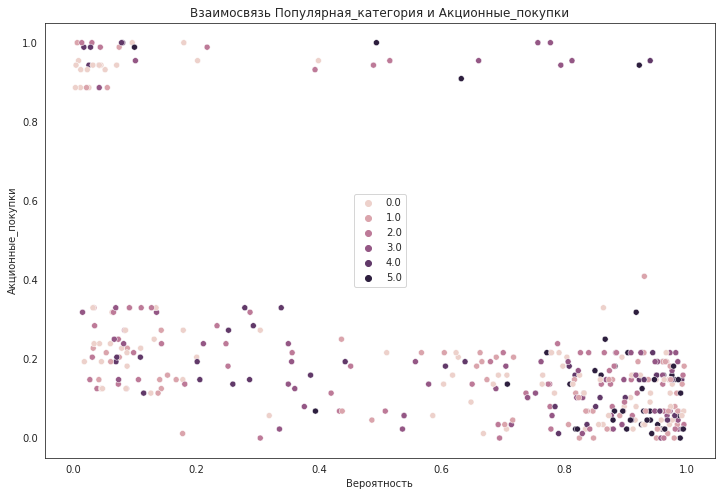

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Акционные_покупки и Популярная_категория"

plt.figure(figsize=(12,8))
sns.scatterplot(data=X_test, x = 'Вероятность',y= 'Акционные_покупки', hue='Популярная_категория')
plt.legend(title="", loc=10)
plt.title("Взаимосвязь Популярная_категория и Акционные_покупки")
plt.show();

0 -'Товары для детей',

1 -'Домашний текстиль',

2 -'Косметика и аксесуары',

3 -'Техника для красоты и здоровья',

4 - 'Кухонная посуда',

5 -'Мелкая бытовая техника и электроника'

In [ ]:
# отберем только класс целевого показателя "снизилась" и посмотрим на распределение по категориям товаров

X_test_0_cat = X_test.query('Вероятность <= 0.4')
display(X_test_0_cat.head())

,x0_стандарт,x1_нет,Популярная_категория,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка1мес,Выручка2мес,Выручка3мес,Время,Покупательская_активность,Вероятность
0,0.0,0.0,4.0,0.526316,0.5,0.538622,0.147727,0.4,0.5,0.222222,0.263158,0.264952,0.433095,0.441443,0.428571,0,0.286843
2,1.0,0.0,1.0,0.385965,0.5,0.470772,0.204545,0.0,0.8,0.888889,0.210526,0.263666,0.751476,0.816057,0.457143,0,0.074430
4,1.0,1.0,0.0,0.456140,0.0,0.751566,0.954545,0.6,0.0,0.555556,0.421053,0.612862,0.596934,0.582408,0.428571,0,0.399055
6,1.0,1.0,0.0,0.561404,0.0,0.088727,1.000000,0.6,0.4,0.333333,0.157895,0.362701,0.546677,0.574939,0.428571,0,0.095513
10,0.0,1.0,1.0,0.438596,0.5,0.755741,0.125000,0.2,0.7,0.777778,0.210526,0.236656,0.739791,0.805926,0.257143,0,0.044824


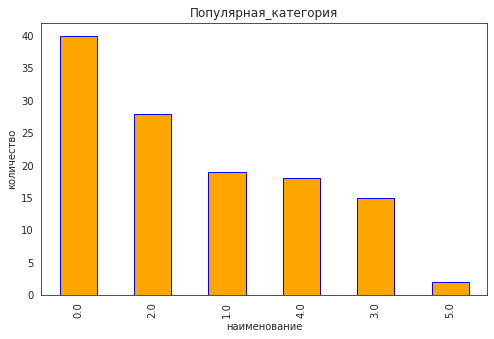

In [ ]:
# график 1

X_test_0_cat['Популярная_категория'].value_counts().plot(kind='bar', figsize=(8,5), ec='blue', color = 'orange')
plt.title('Популярная_категория')
plt.xlabel('наименование')
plt.ylabel('количество')
plt.show();

Среди клиентов, у которых высокая вероятность снижения Покупательской активности, лидирующими категориями товаров стали "Товары для детей" и "Косметика и аксесуары"

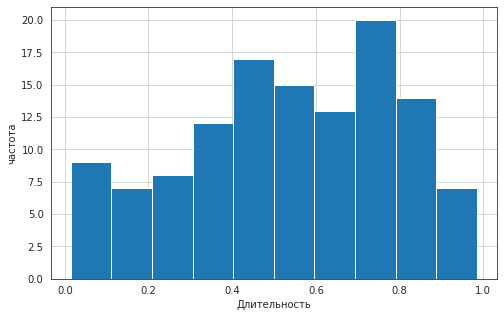

In [ ]:
# график 2

X_test_0_cat['Длительность'].hist(figsize=(8, 5), bins=10)
plt.xlabel('Длительность')
plt.ylabel('частота');

Получается, что распределение по признаку "Длительность" (сколько времени зарегистрирован клиент на сайте) не показательно. Посмотрим, есть ли зависимость времени регистрации на сайте от приобретаемых товаров.

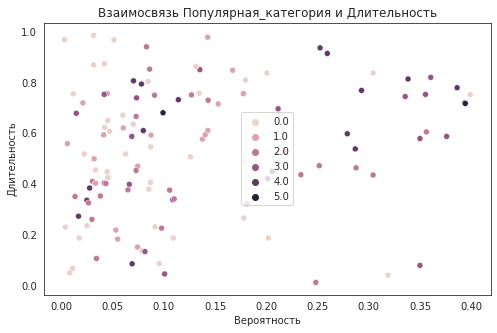

In [ ]:
# график 3
# посмотрим на диаграмму рассеяния "Взаимосвязь Длительность и Популярная_категория"

plt.figure(figsize=(8,5))
sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Длительность', hue='Популярная_категория')
plt.legend(title="", loc=10)
plt.title("Взаимосвязь Популярная_категория и Длительность")
plt.show();

Выраженной зависимости от времени регистрации на сайте и категориями товаров нет

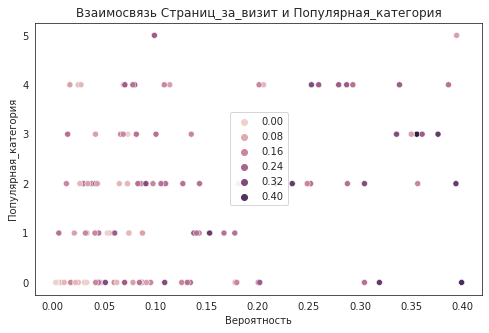

In [ ]:
# график 4
# посмотрим на диаграмму рассеяния "Взаимосвязь Страниц_за_визит и Популярная_категория"

plt.figure(figsize=(8,5))
sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Популярная_категория', hue='Страниц_за_визит')
plt.legend(title="", loc=10)
plt.title("Взаимосвязь Страниц_за_визит и Популярная_категория")
plt.show();

По 3 и 4 категории товаров (Техника для красоты и здоровья и Кухонная посуда) просматривалась большая доля страниц и при этом затем по этим клиентам снижалась покупательская активность: можем сделать вывод о том, что они заходили на сайт купить исключительно эту категорию товаров по акции. А так как эта категория не обладает высокой эластичностью спроса, то клиент покупал и "уходил" (пока ему снова не понадобится посуда, например)

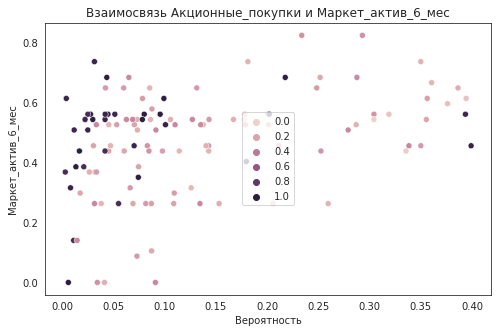

In [ ]:
# график 5
# посмотрим на диаграмму рассеяния "Взаимосвязь Акционные_покупки и Маркет_актив_6_мес"

plt.figure(figsize=(8,5))
sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Маркет_актив_6_мес', hue='Акционные_покупки')
plt.legend(title="", loc=10)
plt.title("Взаимосвязь Акционные_покупки и Маркет_актив_6_мес")
plt.show();

Получается, что этот признак "Маркет_актив_6_мес" снижает вероятность присвоения класса 0 (снизилась) в Акционных_покупках и мы можем использовать этот показатель в рекомендациях.

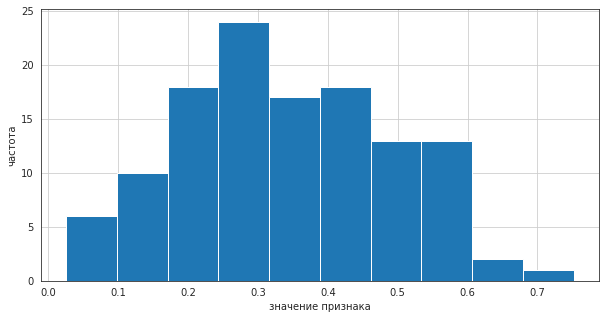

In [ ]:
# построим график как распределена выручка за 1 мес

month1 = X_test_0_cat['Выручка1мес']
month1.hist(figsize=(10, 5), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

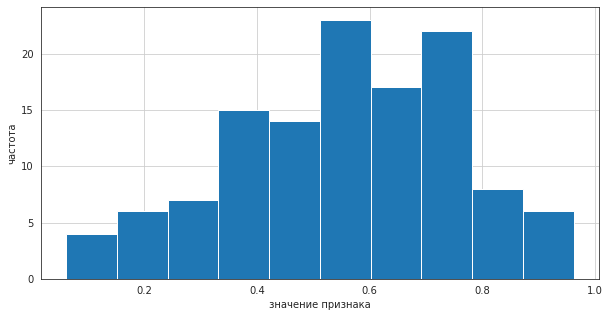

In [ ]:
# построим график как распределена выручка за 2 мес

month1 = X_test_0_cat['Выручка2мес']
month1.hist(figsize=(10, 5), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

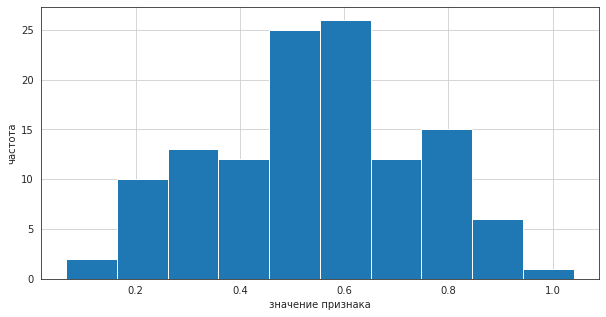

In [ ]:
# построим график как распределена выручка за 3 мес

month1 = X_test_0_cat['Выручка3мес']
month1.hist(figsize=(10, 5), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

В 3 месяце структура выручки изменилась. Ранее на графике мы видели, что выручка в 3 мес выросла относительно предыдущих 2 периодов

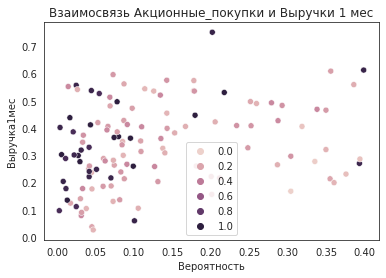

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Акционные_покупки и Выручки"

sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Выручка1мес', hue='Акционные_покупки')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Акционные_покупки и Выручки 1 мес")
plt.show();

В 1 мес по выручке мы видим, что несмотря на то, что была высокая доля покупок по Акции, на выручку это не сильно повлияло, да и вероятность снижалась.

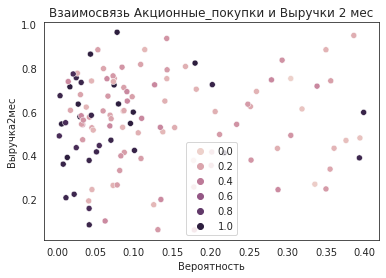

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Акционные_покупки и Выручки"

sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Выручка2мес', hue='Акционные_покупки')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Акционные_покупки и Выручки 2 мес")
plt.show();

Во 2 мес по выручке мы видим, что доля покупок по Акции стала расти и стала расти Выручкая, и при этом вероятность осталась на том же уровне.

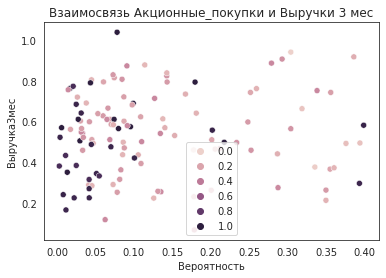

In [ ]:
# посмотрим на диаграмму рассеяния "Взаимосвязь Акционные_покупки и Выручки"

sns.scatterplot(data=X_test_0_cat, x = 'Вероятность',y= 'Выручка3мес', hue='Акционные_покупки')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь Акционные_покупки и Выручки 3 мес")
plt.show();

В 3 мес по выручке мы видим, концентрацию по вероятности в том же диапазоне, что и ранее. Доля покупок по акции снизилась.

### Выводы о сегментах

<span style="text-decoration: underline;">Для определения сегмента</span>

- Использовали тестовый датасет с добавлением вероятности принадлежности к классу и предсказанные значения лучшей модели

- Построили графики зависимости Вероятности отнесения к классу от значимых признаков и от прочих признаков, которые подходили

- Выбрали "Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности", так как эта группа показалась особо интересной с точки зрения реалистичности примера

- Проведены графическое и аналитическое исследование группы покупателей по Категориям товаров, по Длительности регистрации на сайте, по посещаемым Страницам за визит и по Маркетинговым активностям


<span style="text-decoration: underline;">Предложения по работе с сегментом для увеличения покупательской активности:</span>

- Чем больше времени покупатель будет проводить на сайте, тем выше вероятность, что он что-то купит. Для этого необходимо заинтересовать его: возможно, требуется изменения дизайна сайта или навигации по сайту

- Чем больше страниц за визит покупатель будет посещать, тем выше вероятность, что он что-то купит. Для этого необходимо : возможно, требуется изменение структуры продаваемых товаров, изменение / выделение дополнительных категорий товаров. Не найдя нужную категорию, клиент может "уходить" с сайта - соответственно меньшее количество страниц посетить

- Мы определили популярную категорию среди тех клиентов, у которых падала покупательская активность : это "Товары для детей" и "Косметика и аксессуары". Для увеличения активности необходимо добавить несколько признаков, чтобы более качественно определять клиентов, которые покупают "Товары для детей" и директивно предлагать им их (напрмер, наличие детей: да/нет). А по категориям "Косметика и аксесуары" можно добавить пол м/ж и возраст, а также сделать хештеги с названиями праздников, чтобы покупатель мог легко найти эти товары в рекомендациях в качестве подарков.

- Признак "Маркет_актив_6_мес" показывает какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента и чем это число выше, тем ниже вероятность отнесения к классу 0. Значит необходимо поддерживать текущее количество рассылок и возможно добавить несколько директивных рассылок в зависимости от интереса покупателя.

## Общий вывод

Перед нами стояла задача **разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность**, которое состояло из нескольких этапов:

**1.** Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

**2.** В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

**3.** Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

На входе было дано 4 датасета с информацией по покупателям интернет - магазина:

* Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении

* Таблица с данными о выручке, которую получает магазин с покупателя

* Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

* Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю

**В ходе предобработки данных были проведены следующие итерации:**

1) Проверка на пропуски. Пропуски в данных отсутствуют

2) Проверка дубликатов.Явные дубликаты в данных не обнаружены

3) Не явные дубликаты и ошибки в наименованиях исправлены

**Для поиска лучшей модели было сделано:**

- Были подготовлены данные для обучения моделей: целевой признак "Покупательская активность" приведен к бинарному формату, удалены лишние столбцы

- Были сформированы:

1) паплайны для кодирования и масштабирования категориальных и количественных признаков с помощью кодировщиков OneHotEncoder и OrdinalEncoder, и скейлеров MinMaxScaler и StandardScaler

2) пайплайны с моделями и с их гиперпараметрами

- Была отражена таблица с результатами работы моделей и их лучшими параметрами. Данные были осортированы по убыванию лучшего значения метрики

- **По итогам отработки пайплайна лучшей моделью оказалсь SVC(kernel='linear', random_state=55) и Метрика ROC-AUC лучшей модели на кросс-валидации: 0.8990
На тестовой выборке Метрика Площадь ROC-кривой на тестовой выборке: 0.9108**

- Мы использовали один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул нам лучшую модель

<span style="text-decoration: underline;">Для определения сегмента</span>

- Использовали тестовый датасет с добавлением вероятности принадлежности к классу и предсказанные значения лучшей модели

- Построили графики зависимости Вероятности отнесения к классу от значимых признаков и от прочих признаков, которые подходили

- Выбрали "Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности", так как эта группа показалась особо интересной с точки зрения реалистичности примера

- Проведены графическое и аналитическое исследование группы покупателей по Категориям товаров, по Длительности регистрации на сайте, по посещаемым Страницам за визит и по Маркетинговым активностям


<span style="text-decoration: underline;">Предложения по работе с сегментом для увеличения покупательской активности:</span>

- Чем больше времени покупатель будет проводить на сайте, тем выше вероятность, что он что-то купит. Для этого необходимо заинтересовать его: возможно, требуется изменения дизайна сайта или навигации по сайту

- Чем больше страниц за визит покупатель будет посещать, тем выше вероятность, что он что-то купит. Для этого необходимо : возможно, требуется изменение структуры продаваемых товаров, изменение / выделение дополнительных категорий товаров. Не найдя нужную категорию, клиент может "уходить" с сайта - соответственно меньшее количество страниц посетить

- Мы определили популярную категорию среди тех клиентов, у которых падала покупательская активность : это "Товары для детей" и "Косметика и аксессуары". Для увеличения активности необходимо добавить несколько признаков, чтобы более качественно определять клиентов, которые покупают "Товары для детей" и директивно предлагать им их (напрмер, наличие детей: да/нет). А по категориям "Косметика и аксесуары" можно добавить пол м/ж и возраст, а также сделать хештеги с названиями праздников, чтобы покупатель мог легко найти эти товары в рекомендациях в качестве подарков.

- Признак "Маркет_актив_6_мес" показывает какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента и чем это число выше, тем ниже вероятность отнесения к классу 0. Значит необходимо поддерживать текущее количество рассылок и возможно добавить несколько директивных рассылок в зависимости от интереса покупателя.

# Спасибо за внимание!

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта, логичности действий и общему подходу все замечательно, что не может не радовать.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Грамотная предобработка и подготовка признаков.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
* Необходимо уточнить по периодам − в выручке у нас три разных периода, сейчас один теряем.
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* Важно пересчитать ROC_AUC по вероятностям классов.
* Необходимо определить сегмент для анализа по результатам модели - вероятностям классов.
* Рекомендую также углубить и исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Я бы посмотрел на данные в разрезе акции. Думаю, как минимум, это подтвердит наши выводы, ну и возможно как-то их уточнит.
* Эти и остальные замечания я также написал по ходу проекта.    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.

* Важно оставить признаки всех трех периодов для модели, а также использовать их в последнем шаге с анализом сегмента.
* Необходимо выбрать сегмент именно по вероятностям снижения активности.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к проверке**

Спасибо за доработку. Критичных комментариев нет.
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>